In [1]:

import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile #to open zipfile
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
import warnings
warnings.filterwarnings('ignore')

In [48]:
data_zip_path = 'archive.zip'

# open csv file from zip
def read_zipped_csv(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_filename = z.namelist()[0]
        
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

df = read_zipped_csv(data_zip_path)

In [49]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### Data Understanding and Exploration

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

In [51]:
# Have a first look at the numerical variables and their distirbutions
df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.546888e+05,2.041560e+00,2.045584e+01,7.604112e+05,4.822610e+01,2.913232e+05,1.276393e+00
std,4.207457e+05,3.097234e+00,3.315669e+02,1.944925e+07,6.057823e+01,5.319290e+06,7.889555e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.846625e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,8.183790e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,6.000000e-01
75%,1.140640e+06,5.000000e+00,1.000000e+00,0.000000e+00,8.900000e+01,0.000000e+00,9.170000e-01
max,1.411041e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


In [52]:
# Have a first look at the categorical variables and their distirbutions
df.describe(include='O')

,title,status,release_date,imdb_id,original_language,original_title,overview,tagline,genres,production_companies,production_countries,spoken_languages,keywords
count,1048562,1048575,866758,560572,1048575,1048562,832751,152728,633603,480147,585078,607913,292621
unique,903262,6,42375,559319,172,933950,808624,146892,13117,197343,9723,6839,170704
top,Home,Released,1/1/2006,tt32094375,en,Untitled,,English,Documentary,Evil Angel,United States of America,English,short film
freq,143,1022770,3202,64,566257,95,1136,224,120668,2591,166444,220788,9228


In [53]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(df)

Your selected dataframe has 21 columns.
There are 11 columns that have missing values.


In [17]:
missing_values.head(15)

,Missing Values,% of Total Values
tagline,895847,85.4
keywords,755954,72.1
production_companies,568428,54.2
imdb_id,488003,46.5
production_countries,463497,44.2
spoken_languages,440662,42.0
genres,414972,39.6
overview,215824,20.6
release_date,181817,17.3
title,13,0.0


These colums are the ones that have lots of missing values so we'll have to address them in the later section of pre-processing and data cleaning.

- tagline: 85.4 %

- keywords: 72.1 %

- production_companies: 54.2%

- imdb_id: 46.5%

...

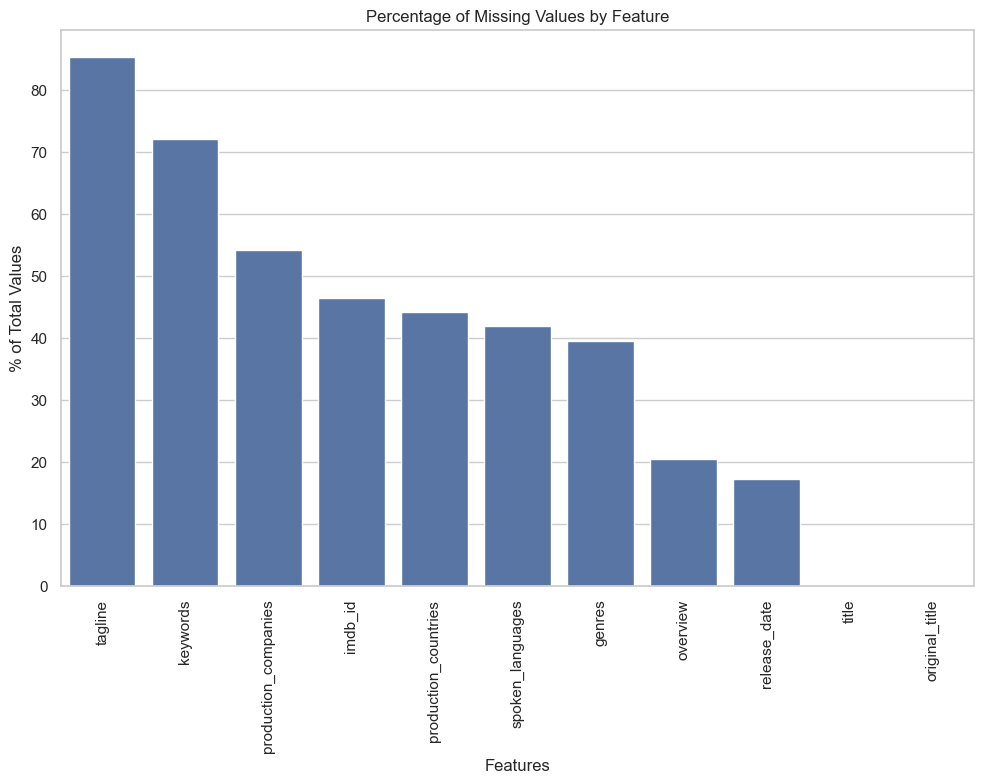

In [54]:
def plot_missing_values(mis_val_table, title):
    plt.figure(figsize=(10, 8))
    
    # Create a bar plot for the percentage of missing values
    sns.barplot(x=mis_val_table.index, 
                y=mis_val_table['% of Total Values'])
    
    # Rotate the x labels for better readability
    plt.xticks(rotation=90)
    
    # Set plot labels and title
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('% of Total Values')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the missing values
plot_missing_values(missing_values,title= 'Percentage of Missing Values by Feature')

In [56]:
# Function to calculate zero values by column
def zero_values_table(df):
    # Total zero values
    zero_val = (df == 0).sum()
    
    # Percentage of zero values
    zero_val_percent = 100 * (df == 0).sum() / len(df)
    
    # Make a table with the results
    zero_val_table = pd.concat([zero_val, zero_val_percent], axis=1)
    
    # Rename the columns
    zero_val_table_ren_columns = zero_val_table.rename(
        columns={0: 'Zero Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of zero values in descending order
    zero_val_table_ren_columns = zero_val_table_ren_columns[
        zero_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(zero_val_table_ren_columns.shape[0]) +
          " columns that have zero values.")
    
    # Return the dataframe with zero values information
    return zero_val_table_ren_columns


zero_values = zero_values_table(df)

Your selected dataframe has 21 columns.
There are 7 columns that have zero values.


In [57]:
zero_values.head(15)

# The column Agreement Date has a high percentage of zero values because it's a binary feature and thus being equal to 0 means no Agreement Reached.

,Zero Values,% of Total Values
revenue,1027899,98.0
budget,991807,94.6
adult,951555,90.7
vote_average,697950,66.6
vote_count,697613,66.5
runtime,293833,28.0
popularity,137908,13.2


### Variance

In [58]:
numerical_cols = df.select_dtypes(include=['number']).columns
variances = df[numerical_cols].var()
print(variances)

id              1.770269e+11
vote_average    9.592859e+00
vote_count      1.099366e+05
revenue         3.782733e+14
runtime         3.669721e+03
budget          2.829485e+13
popularity      6.224507e+01
dtype: float64


### Check if ID and IMDB_ID are unique

In [59]:
total_rows=len(df)

unique_id=df["id"].nunique()
unique_imdb_id=df["imdb_id"].nunique()

duplicated_id=total_rows-unique_id
duplicated_imdb_id=total_rows-unique_imdb_id

print(f'Total duplicated IDs: {duplicated_id}')
print(f'Total duplicated IMDB IDs: {duplicated_imdb_id}')

Total duplicated IDs: 794
Total duplicated IMDB IDs: 489256


### Genres analysis

In [ ]:
df["genres"].nunique()

13117

### Vote_Average and Vote_count analysis

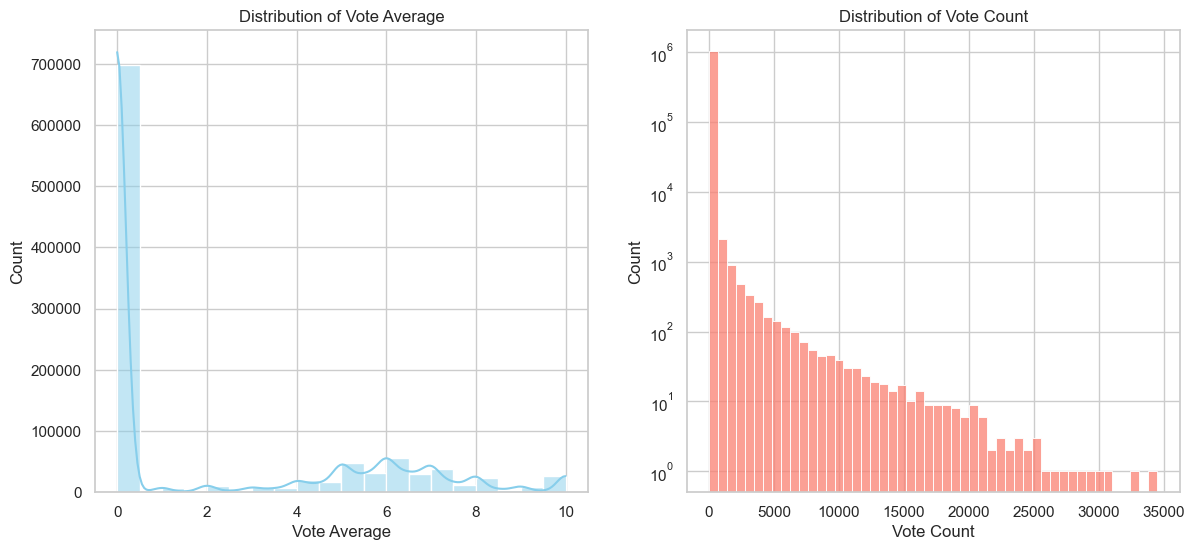

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for vote_average
sns.histplot(df['vote_average'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Vote Average')
axes[0].set_xlabel('Vote Average')
axes[0].set_ylabel('Count')

# Histogram for vote_count (log-scaled if skewed)
sns.histplot(df['vote_count'], bins=50, kde=False, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Vote Count')
axes[1].set_xlabel('Vote Count')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log') 


There's a huge spike at 0, suggesting many entries have a vote_average of 0 — likely movies with no actual ratings.
The rest of the distribution looks bimodal, with a bump around 6–7, which aligns with typical average ratings on platforms like IMDb or TMDB.

There's a long tail of movies with thousands of votes, likely the popular ones.

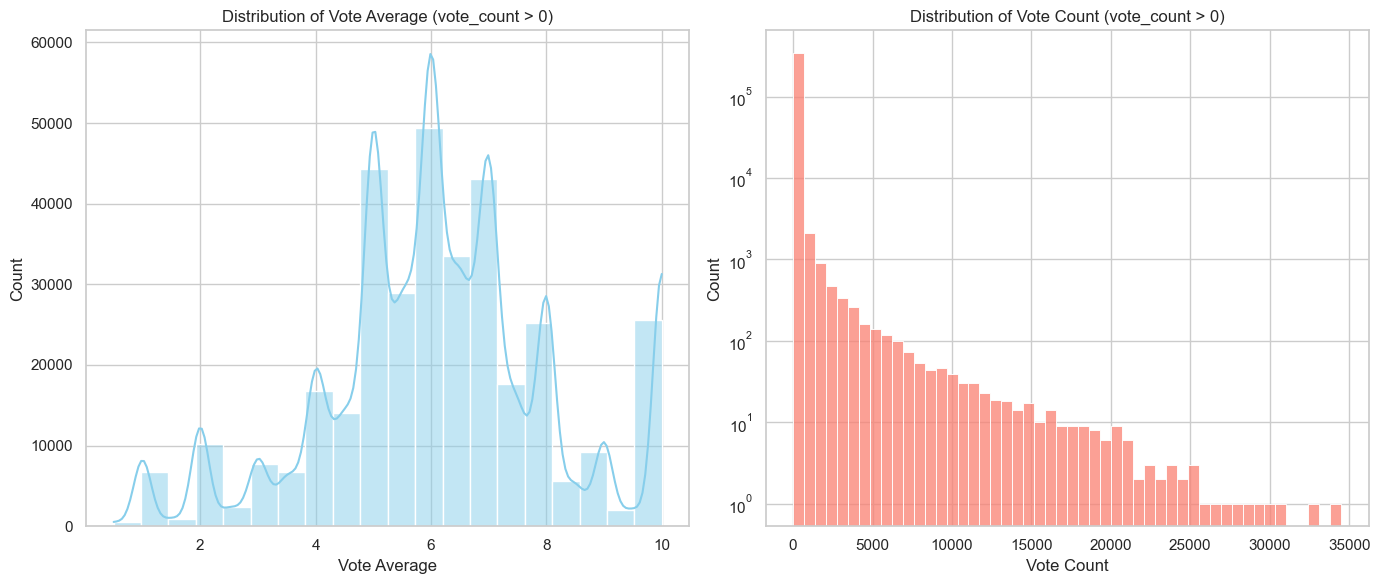

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with vote_count == 0 (and optionally vote_average == 0)
data_filtered = df[(df['vote_count'] > 0) & (df['vote_average'] > 0)]

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for vote_average
sns.histplot(data_filtered['vote_average'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Vote Average (vote_count > 0)')
axes[0].set_xlabel('Vote Average')
axes[0].set_ylabel('Count')

# Histogram for vote_count (log-scaled if skewed)
sns.histplot(data_filtered['vote_count'], bins=50, kde=False, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Vote Count (vote_count > 0)')
axes[1].set_xlabel('Vote Count')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')  # Optional: use log scale for better visibility

plt.tight_layout()
plt.show()


The rest of the distribution looks bimodal, with a bump around 6–7, which aligns with typical average ratings on platforms like IMDb or TMDB.

### Revenue and Budget analysis

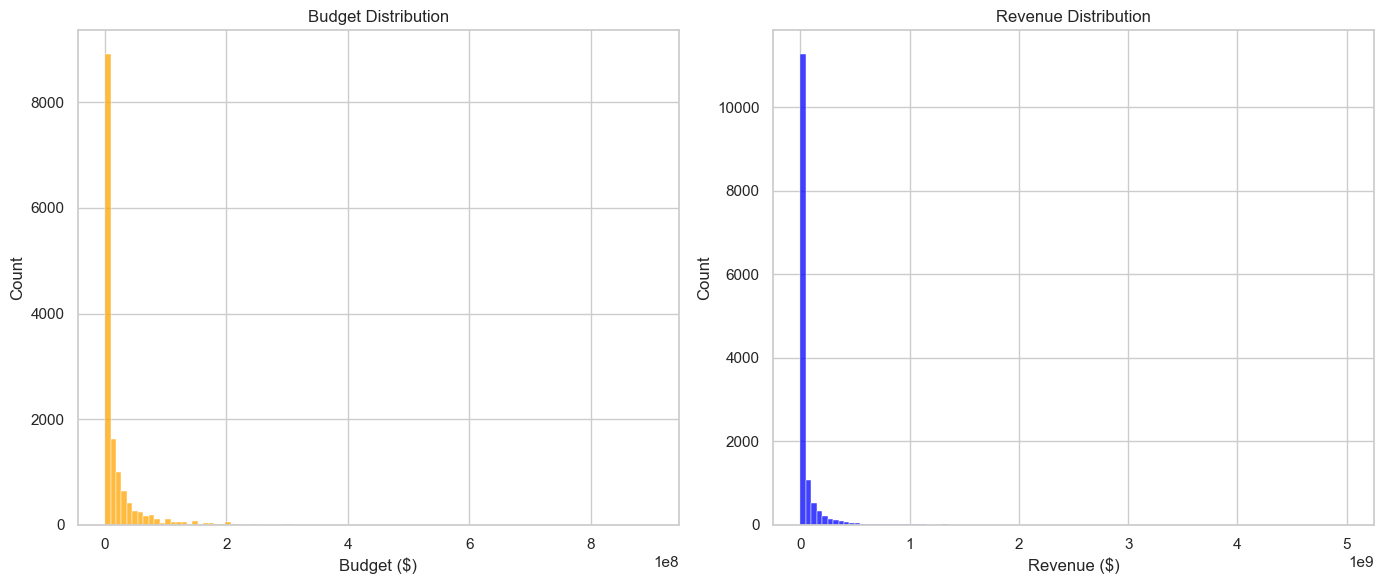

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows with valid budget and revenue
df_money = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Plot original distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_money['budget'], bins=100, ax=axes[0], color='orange')
axes[0].set_title('Budget Distribution')
axes[0].set_xlabel('Budget ($)')
axes[0].set_ylabel('Count')

sns.histplot(df_money['revenue'], bins=100, ax=axes[1], color='blue')
axes[1].set_title('Revenue Distribution')
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


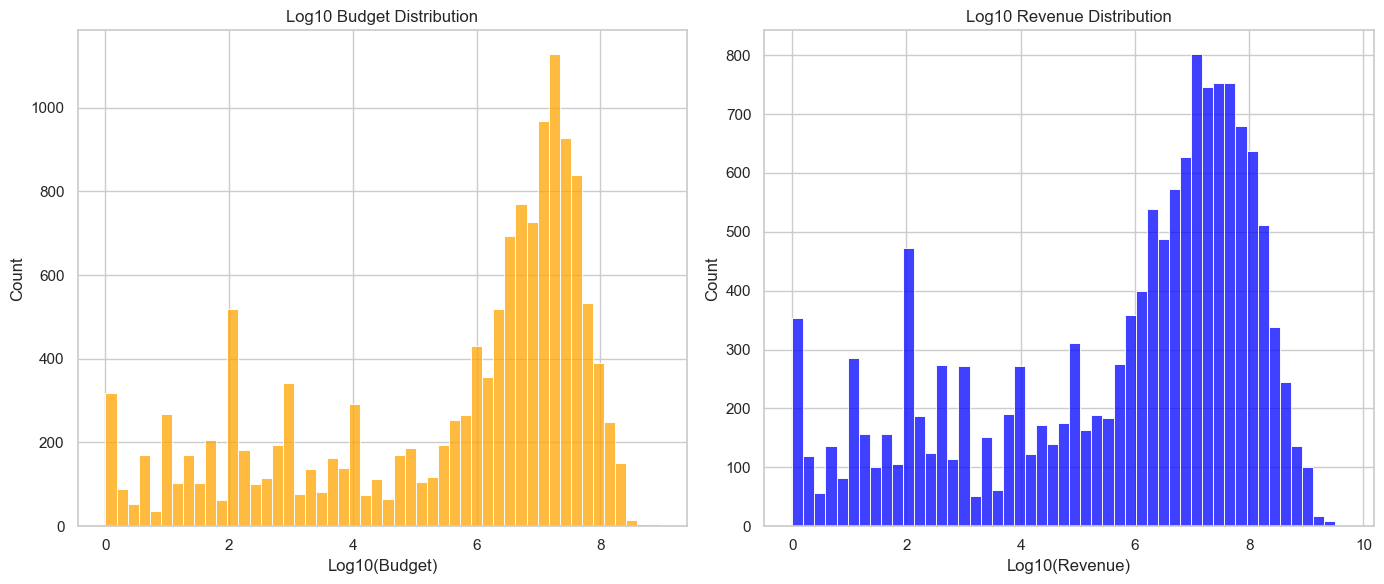

In [ ]:
# Add log-transformed columns
df_money['log_budget'] = np.log10(df_money['budget'])
df_money['log_revenue'] = np.log10(df_money['revenue'])

# Plot log-transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_money['log_budget'], bins=50, ax=axes[0], color='orange')
axes[0].set_title('Log10 Budget Distribution')
axes[0].set_xlabel('Log10(Budget)')

sns.histplot(df_money['log_revenue'], bins=50, ax=axes[1], color='blue')
axes[1].set_title('Log10 Revenue Distribution')
axes[1].set_xlabel('Log10(Revenue)')

plt.tight_layout()
plt.show()


In [32]:
# Create Profit and ROI to enhance our analysis

data['profit'] = data['revenue'] - data['budget']
data['roi'] = data['revenue'] / data['budget'].replace(0, np.nan)

In [34]:
# Basic statistics
print(data[['profit', 'roi']].describe())


             profit           roi
count  1.048575e+06  5.676800e+04
mean   4.690880e+05  9.010377e+04
std    1.667270e+07  7.784707e+06
min   -1.000000e+09 -1.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00
max    5.000000e+09  1.000000e+09


Because we have a lot of missing values in both of this variables (~ 95%), there not much we can do.

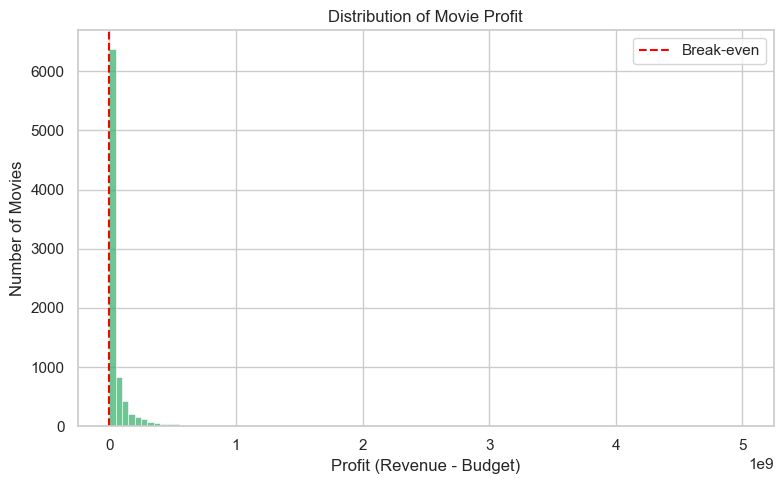

In [37]:
profit_roi_filtered = data[(data['profit'] > 0) & (data['roi'] > 0)]

plt.figure(figsize=(8, 5))
sns.histplot(profit_roi_filtered['profit'], bins=100, color='mediumseagreen')
plt.title('Distribution of Movie Profit')
plt.xlabel('Profit (Revenue - Budget)')
plt.ylabel('Number of Movies')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.legend()
plt.tight_layout()
plt.show()


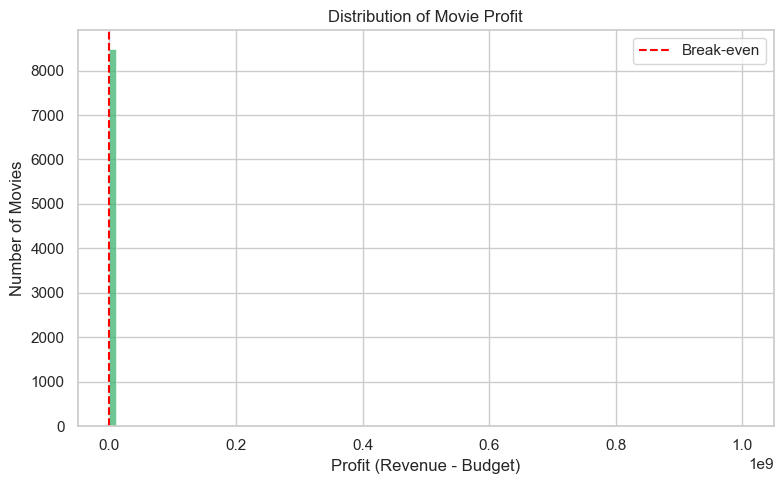

In [38]:
profit_roi_filtered = data[(data['profit'] > 0) & (data['roi'] > 0)]

plt.figure(figsize=(8, 5))
sns.histplot(profit_roi_filtered['roi'], bins=100, color='mediumseagreen')
plt.title('Distribution of Movie Profit')
plt.xlabel('Profit (Revenue - Budget)')
plt.ylabel('Number of Movies')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
# Movies with Highest profit

top_profit = profit_roi_filtered.sort_values(by='profit', ascending=False).head(10)
print(top_profit[['title', 'revenue', 'budget', 'profit']])


                               title     revenue     budget      profit
481617             babben: the movie  4999999999        100  4999999899
560984                     Bee Movie  2930000000  150000000  2780000000
234307             TikTok Rizz Party  3000000000  250000000  2750000000
3                             Avatar  2923706026  237000000  2686706026
15                 Avengers: Endgame  2800000000  356000000  2444000000
707555       Adventures in Bora Bora  3000000000  800000000  2200000000
17                           Titanic  2264162353  200000000  2064162353
552794                   Best Of Joy  2000000000       1000  1999999000
282         Avatar: The Way of Water  2320250281  460000000  1860250281
56      Star Wars: The Force Awakens  2068223624  245000000  1823223624


In [45]:
# Movies with Highest ROI

top_roi = profit_roi_filtered.sort_values(by='roi', ascending=False)[['title', 'budget', 'revenue', 'roi']].head(10)
print(top_roi)


                                   title  budget     revenue           roi
499447  GEESE - THE MONEY TALKS TOUR '24       1  1000000000  1.000000e+09
649647             Pouring Out The Heart       1  1000000000  1.000000e+09
628261                ירידתם של המגניבים       1  1000000000  1.000000e+09
289501                     Lil Detective       2   999999999  5.000000e+08
628205                   חברים על סמים 1       5  1000000000  2.000000e+08
628749                   חברים על סמים 2       5  1000000000  2.000000e+08
628329                              דילן       5  1000000000  2.000000e+08
233343                Żyraf: Czas Zemsty       1   100004215  1.000042e+08
650550           The Read N Review Movie       2   200000000  1.000000e+08
389246                            ¡Slap!       1   100000000  1.000000e+08


ok wth

### Runtime analysis

In [77]:
df["runtime"].describe()

count    1.048575e+06
mean     4.822610e+01
std      6.057823e+01
min     -2.800000e+01
25%      0.000000e+00
50%      2.300000e+01
75%      8.900000e+01
max      1.440000e+04
Name: runtime, dtype: float64

In [79]:
# Movie with negative runtime
filmes_runtime_negativo = df[df['runtime'] < 0]
print(f"Filmes com runtime negativo: {len(filmes_runtime_negativo)}")
print(filmes_runtime_negativo[['title', 'runtime']])


Filmes com runtime negativo: 1
                    title  runtime
558965  An Eye For An Eye      -28


We will remove that movie, doesn't make sense

In [80]:
# Check for movies with 0 runtime
outliers_runtime = df[(df['runtime'] == 0)]

# Display the count of problematic runtimes
print(f"Movies with 0 runtime: {len(outliers_runtime)}")



Movies with 0 runtime: 293833


In [82]:
# Calculate the first (Q1) and third (Q3) quartiles
Q1_runtime = df['runtime'].quantile(0.25)
Q3_runtime = df['runtime'].quantile(0.75)
IQR_runtime = Q3_runtime - Q1_runtime

# Define the lower and upper bounds for outliers
lower_bound_runtime = Q1_runtime - 1.5 * IQR_runtime
upper_bound_runtime = Q3_runtime + 1.5 * IQR_runtime

# Identify the outliers in the 'runtime' column
outliers_runtime = df[(df['runtime'] < lower_bound_runtime) | (df['runtime'] > upper_bound_runtime)]
df_no_outliers = df[(df['runtime'] >= lower_bound_runtime) & (df['runtime'] <= upper_bound_runtime)]

# Display the number of outliers
print(f"Movies with outlier runtime values: {len(outliers_runtime)}")


Movies with outlier runtime values: 8254


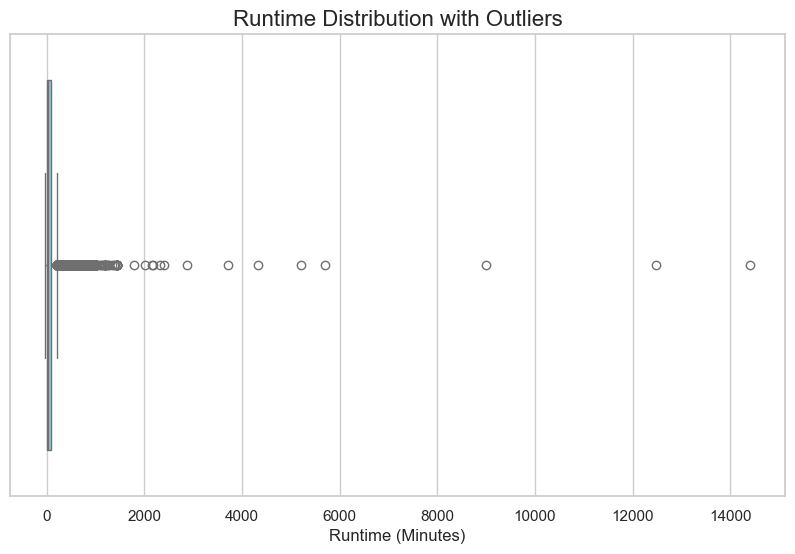

In [81]:
# Plot the distribution of runtime with boxplot to highlight outliers
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize outliers
sns.boxplot(x=df['runtime'], color='skyblue')

# Add a title and labels
plt.title("Runtime Distribution with Outliers", fontsize=16)
plt.xlabel("Runtime (Minutes)", fontsize=12)

# Show the plot
plt.show()


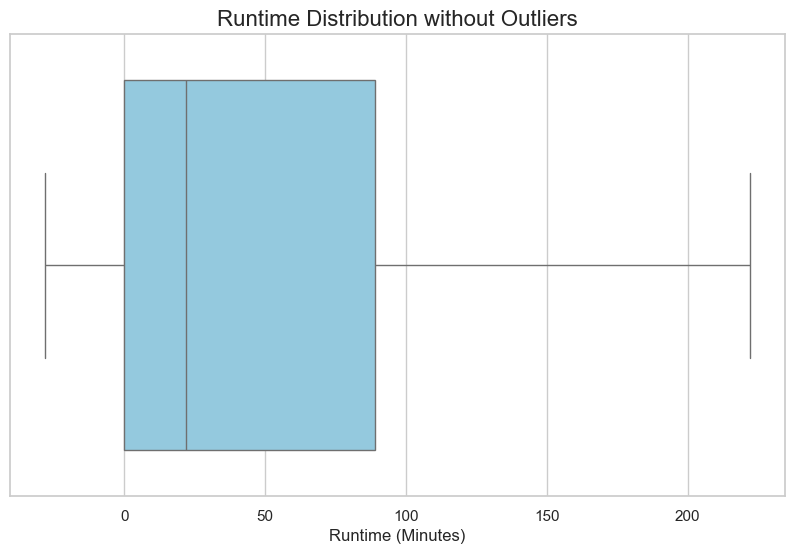

In [83]:
# Plot the distribution of runtime without outliers using a boxplot
plt.figure(figsize=(10, 6))

# Create a boxplot for runtime (without outliers)
sns.boxplot(x=df_no_outliers['runtime'], color='skyblue')

# Add a title and labels
plt.title("Runtime Distribution without Outliers", fontsize=16)
plt.xlabel("Runtime (Minutes)", fontsize=12)

# Show the plot
plt.show()

### Popularity analysis

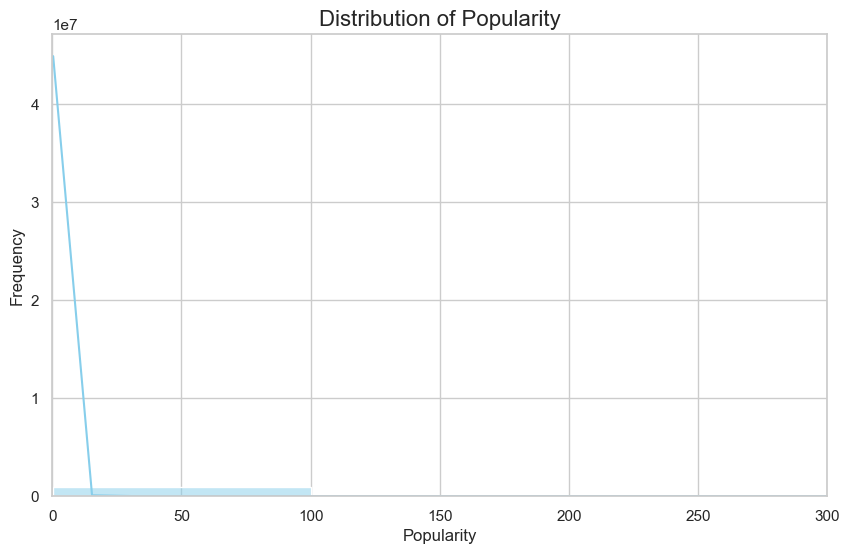

In [92]:
pop_filtered = df[df['popularity'] > 0]

# Plot the distribution of popularity
plt.figure(figsize=(10, 6))

# Create a histogram and KDE plot for popularity
sns.histplot(pop_filtered['popularity'], kde=True, color='skyblue', bins=30)

plt.xlim(0, 300)

# Add a title and labels
plt.title("Distribution of Popularity", fontsize=16)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()


### Correlation matrix for popularity, vote_count, and revenue

In [ ]:

correlation_popularity = df[['popularity', 'vote_count', 'revenue']].corr()

# Display the correlation matrix
print("Correlation between Popularity, Vote Count, and Revenue:")
print(correlation_popularity)


Correlation between Popularity, Vote Count, and Revenue:
            popularity  vote_count   revenue
popularity    1.000000    0.254086  0.217021
vote_count    0.254086    1.000000  0.667021
revenue       0.217021    0.667021  1.000000


Vote count appears to have the strongest relationship with revenue.

Both popularity and vote count are positively correlated with revenue, but the relationship with popularity is weaker compared to the relationship between vote count and revenue.

### Release_Date Analysis

In [96]:
# Convert the 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df.release_date.head()

0   2010-07-15
1   2014-11-05
2   2008-07-16
3   2009-12-15
4   2012-04-25
Name: release_date, dtype: datetime64[ns]

In [99]:
# Count the number of missing or invalid release dates
invalid_release_dates_count = df['release_date'].isnull().sum()

print(f"Number of invalid or missing release dates: {invalid_release_dates_count}")


Number of invalid or missing release dates: 183787


In [102]:
# Check for future dates (dates beyond today)
future_dates_count = df[df['release_date'] > pd.Timestamp.now()].shape[0]

# Check for far past dates (e.g., before 1900)
far_past_dates_count = df[df['release_date'] < pd.Timestamp('1900-01-01')].shape[0]
print(f"Number of future dates: {future_dates_count}")
print(f"Number of old dates (before 1900): {far_past_dates_count}")


Number of future dates: 430
Number of old dates (before 1900): 0
